In [1]:
import numpy as np
import pandas as pd
import math
import sys
import copy
import glob
import os
from PlotUtility import *
from DataUtility import *

In [2]:
dataPath = "./Data/"
mergedDataPath = MergeJsonAndLabel(dataPath, "./")
dataset = Dataset(mergedDataPath, Debug = True)

         Label  Hand  IndexCurl  MiddleCurl  RingCurl  PinkyCurl  ThumbCurl  \
0        Pinch     1   0.404110    0.710278  0.778920   0.820734   0.467493   
1        Point     1   0.024863    0.476941  0.659417   0.717721   0.690835   
2  WebSlinging     1   0.034657    0.669262  0.611272   0.068342   0.305163   
3         Palm     1   0.004019    0.001182  0.002651   0.003718   0.268434   
4         Fist     1   0.356252    0.468106  0.601916   0.749858   0.607392   

   NoneXRotation  NoneYRotation  NoneZRotation  ...  PinkyTipZUp  \
0              0              0              0  ...    -0.960178   
1              0              0              0  ...    -0.233594   
2              0              0              0  ...    -0.624451   
3              0              0              0  ...     0.342675   
4              0              0              0  ...    -0.466670   

   PinkyTipXRight  PinkyTipYRight  PinkyTipZRight  PinkyTipXLocalRotation  \
0        0.747509       -0.652078      

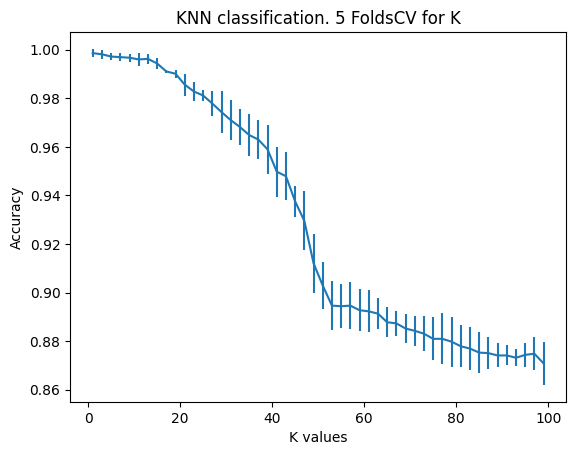

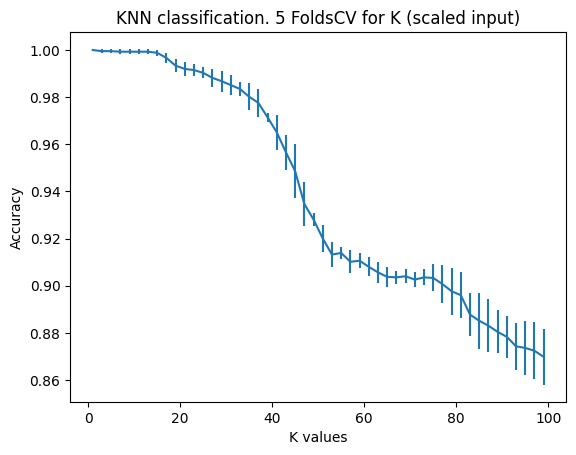

In [4]:
KVals = np.arange(1,101,2)
mse,std = PerformKFoldsValidationAndPlot("KNN", dataset, KVals, "K", yLabel = "Accuracy", scale = False)
mse,std = PerformKFoldsValidationAndPlot("KNN", dataset, KVals, "K", yLabel = "Accuracy", scale = True)

In [ ]:
KVals = np.arange(1,41,2)
mse,std = PerformKFoldsValidationAndPlot("KNN", dataset, KVals, "K", yLabel = "Accuracy", scale = True)

In [ ]:
idealK = 51
TestValidationAccuracy("KNN", dataset, c = None, K = idealK, scaleInput = True)

In [ ]:
KNNModel = MLModel()
KNNModel.AssignModelAndHyperParameters("KNN", K = idealK)
KNNModel.TrainModel(dataset, True)
KNNModel.ExportModel("./")

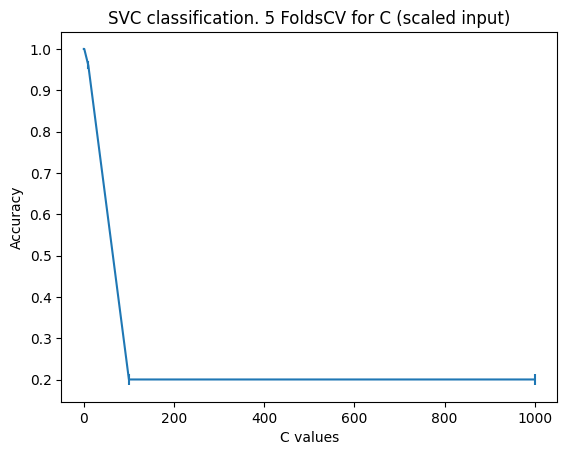

In [5]:
CVals = [0.01,0.1,1,10,100,1000]
mse,std = PerformKFoldsValidationAndPlot("SVC", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

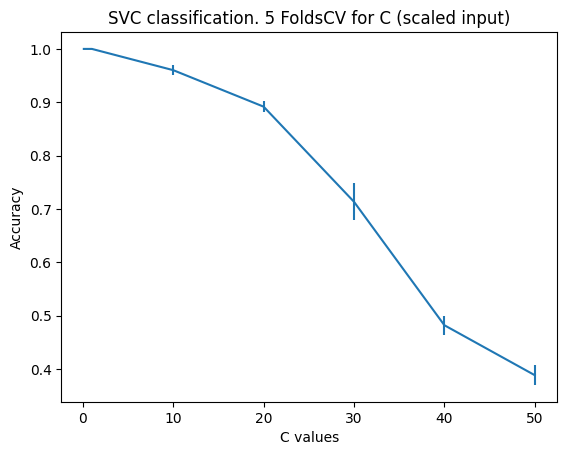

In [6]:
CVals = [0.1,1,10,20,30,40,50]
mse,std = PerformKFoldsValidationAndPlot("SVC", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

In [ ]:
CVals = [0.1,1,10,20,30,40,50]
mse,std = PerformKFoldsValidationAndPlot("SVC", dataset, CVals, "C", yLabel = "Accuracy", scale = True)

In [9]:
idealC = 10
TestValidationAccuracy("SVC", dataset, c = idealC, K = None, scaleInput = True)

Getting Validation accuracy for SVC
Validation Accuracy for SVC : 0.978813559322034


In [ ]:

SVCModel = MLModel()
SVCModel.AssignModelAndHyperParameters("SVC", c = idealC)
SVCModel.TrainModel(dataset, True)
SVCModel.ExportModel("./")